In [1]:
!pip install qiskit qiskit[visualization] qiskit_aer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import QuantumCircuit
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

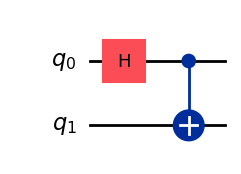

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')


In [5]:
state = Statevector(qc)
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [6]:
state.draw('latex')

<IPython.core.display.Latex object>

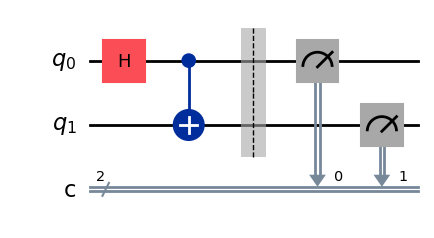

In [7]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.measure([0,1], [0,1])
qc.draw('mpl')

In [8]:
backend = AerSimulator()
job = backend.run(qc, shots=2048)
result = job.result()
counts = result.get_counts()
counts

{'11': 1028, '00': 1020}

In [9]:
from qiskit.providers.fake_provider import GenericBackendV2

In [10]:
backend = GenericBackendV2(3)
job = backend.run(qc, shots=2048)
counts = job.result().get_counts()
counts

{'01': 18, '10': 13, '00': 1011, '11': 1006}

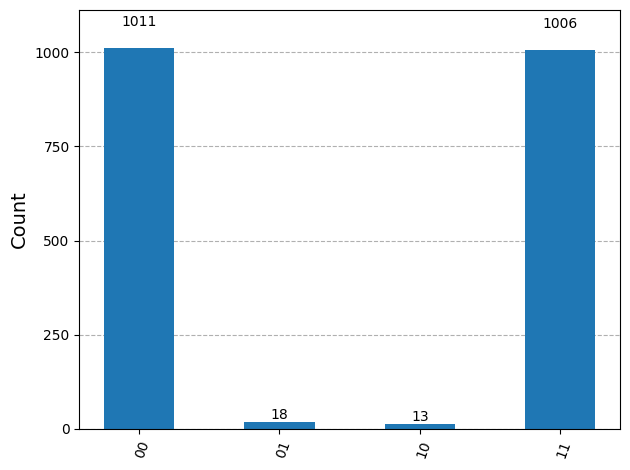

In [11]:
plot_histogram(counts)